# Incidence de la varicelle

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import urllib

 Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](https://sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en décembre 1990 et se termine avec une semaine récente.

In [13]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Nous conservons les données dans un fichier local, afin que la conservation du fichier sur lequel nous effectuons notre analyse soit robuste aux défaillances du site Sentiweb. À cette fin également, nous ne retéléchargeons pas automatiquement une nouvelle version à chaque exécution, mais seulement si le fichier local est manquant.

In [14]:
if not os.path.exists("incidence-PAY-7.csv"):
    urllib.request.urlretrieve(data_url, "incidence-PAY-7.csv")

 Voici l'explication des colonnes données sur le site d'origine:


Nom de colonne | Libellé de colonne
:-------------- | :------------------
week | Semaine calendaire (ISO 8601)
indicator | Code de l'indicateur de surveillance
inc | Estimation de l'incidence de consultations en nombre de cas
inc_low | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation
inc_up | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation
inc100 | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)
inc100_low |Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)
inc100_up | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)
geo_insee | Code de la zone géographique concernée ([Code INSEE](http://www.insee.fr/fr/methodes/nomenclatures/cog/))
geo_name | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)


La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [18]:
raw_data = pd.read_csv("incidence-PAY-7.csv", skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202234          7   2306      593    4019       3           0   
1     202233          7   7353        0   17414      11           0   
2     202232          7   7801     4086   11516      12           6   
3     202231          7   6896     4170    9622      10           6   
4     202230          7   9039     5770   12308      14           9   
5     202229          7  14851    10060   19642      22          15   
6     202228          7  15471    11028   19914      23          16   
7     202227          7  21191    16198   26184      32          24   
8     202226          7  16854    12806   20902      25          19   
9     202225          7  22246    18011   26481      34          28   
10    202224          7  22458    18105   26811      34          27   
11    202223          7  18772    14875   22669      28          22   
12    202222          7  18916    14941   22891      29          23   
13    202221          7  20310    16307   24313      31          25   
14    202220          7  23585    19004   28166      36          29   
15    202219          7  18593    14181   23005      28          21   
16    202218          7  17851    13963   21739      27          21   
17    202217          7  20314    16001   24627      31          24   
18    202216          7  19660    14860   24460      30          23   
19    202215          7  17799    13715   21883      27          21   
20    202214          7  17005    13162   20848      26          20   
21    202213          7  15448    11659   19237      23          17   
22    202212          7  14702    10794   18610      22          16   
23    202211          7  11729     8347   15111      18          13   
24    202210          7  13314    10036   16592      20          15   
25    202209          7  10485     7600   13370      16          12   
26    202208          7  12088     8741   15435      18          13   
27    202207          7  14003    10789   17217      21          16   
28    202206          7   9798     7048   12548      15          11   
29    202205          7  10851     7797   13905      16          11   
...      ...        ...    ...      ...     ...     ...         ...   
1626  199126          7  17608    11304   23912      31          20   
1627  199125          7  16169    10700   21638      28          18   
1628  199124          7  16171    10071   22271      28          17   
1629  199123          7  11947     7671   16223      21          13   
1630  199122          7  15452     9953   20951      27          17   
1631  199121          7  14903     8975   20831      26          16   
1632  199120          7  19053    12742   25364      34          23   
1633  199119          7  16739    11246   22232      29          19   
1634  199118          7  21385    13882   28888      38          25   
1635  199117          7  13462     8877   18047      24          16   
1636  199116          7  14857    10068   19646      26          18   
1637  199115          7  13975     9781   18169      25          18   
1638  199114          7  12265     7684   16846      22          14   
1639  199113          7   9567     6041   13093      17          11   
1640  199112          7  10864     7331   14397      19          13   
1641  199111          7  15574    11184   19964      27          19   
1642  199110          7  16643    11372   21914      29          20   
1643  199109          7  13741     8780   18702      24          15   
1644  199108          7  13289     8813   17765      23          15   
1645  199107          7  12337     8077   16597      22          15   
1646  199106          7  10877     7013   14741      19          12   
1647  199105          7  10442     6544   14340      18          11   
1648  199104          7   7913     4563   11263      14           8   
1649  199103          7  15387    10484   20290      27          18   
1650  199102          7  16277  

Nous vérifions s'il existe des données manquantes dans ce fichier. En l'occurence, aucune donnée ne manque de jusqu'à septembre 2022.

In [20]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Pour rester robuste à de futures analyses des incidences, où certaines données pourraient manquer, nous prenons la précaution d'ôter les semaines où les données sont manquantes.

In [22]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202234          7   2306      593    4019       3           0   
1     202233          7   7353        0   17414      11           0   
2     202232          7   7801     4086   11516      12           6   
3     202231          7   6896     4170    9622      10           6   
4     202230          7   9039     5770   12308      14           9   
5     202229          7  14851    10060   19642      22          15   
6     202228          7  15471    11028   19914      23          16   
7     202227          7  21191    16198   26184      32          24   
8     202226          7  16854    12806   20902      25          19   
9     202225          7  22246    18011   26481      34          28   
10    202224          7  22458    18105   26811      34          27   
11    202223          7  18772    14875   22669      28          22   
12    202222          7  18916    14941   22891      29          23   
13    202221          7  20310    16307   24313      31          25   
14    202220          7  23585    19004   28166      36          29   
15    202219          7  18593    14181   23005      28          21   
16    202218          7  17851    13963   21739      27          21   
17    202217          7  20314    16001   24627      31          24   
18    202216          7  19660    14860   24460      30          23   
19    202215          7  17799    13715   21883      27          21   
20    202214          7  17005    13162   20848      26          20   
21    202213          7  15448    11659   19237      23          17   
22    202212          7  14702    10794   18610      22          16   
23    202211          7  11729     8347   15111      18          13   
24    202210          7  13314    10036   16592      20          15   
25    202209          7  10485     7600   13370      16          12   
26    202208          7  12088     8741   15435      18          13   
27    202207          7  14003    10789   17217      21          16   
28    202206          7   9798     7048   12548      15          11   
29    202205          7  10851     7797   13905      16          11   
...      ...        ...    ...      ...     ...     ...         ...   
1626  199126          7  17608    11304   23912      31          20   
1627  199125          7  16169    10700   21638      28          18   
1628  199124          7  16171    10071   22271      28          17   
1629  199123          7  11947     7671   16223      21          13   
1630  199122          7  15452     9953   20951      27          17   
1631  199121          7  14903     8975   20831      26          16   
1632  199120          7  19053    12742   25364      34          23   
1633  199119          7  16739    11246   22232      29          19   
1634  199118          7  21385    13882   28888      38          25   
1635  199117          7  13462     8877   18047      24          16   
1636  199116          7  14857    10068   19646      26          18   
1637  199115          7  13975     9781   18169      25          18   
1638  199114          7  12265     7684   16846      22          14   
1639  199113          7   9567     6041   13093      17          11   
1640  199112          7  10864     7331   14397      19          13   
1641  199111          7  15574    11184   19964      27          19   
1642  199110          7  16643    11372   21914      29          20   
1643  199109          7  13741     8780   18702      24          15   
1644  199108          7  13289     8813   17765      23          15   
1645  199107          7  12337     8077   16597      22          15   
1646  199106          7  10877     7013   14741      19          12   
1647  199105          7  10442     6544   14340      18          11   
1648  199104          7   7913     4563   11263      14           8   
1649  199103          7  15387    10484   20290      27          18   
1650  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne intitulée 'period'.

In [24]:
 def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il reste deux petites modifications à faire.
 
Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.
 
Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [26]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Nos données couvrent donc bien tout l'intervalle des relevés d'incidence, confortant le fait que nous n'avons pas trouvé de données manquantes.

In [28]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Effectuons un premier affichage graphique des données d'incidence de varicelle de 1991 à aujourd'hui.

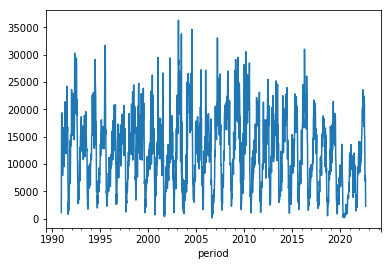

In [30]:
sorted_data['inc'].plot()

En se concentrant sur une période de temps moins étendue, nous observons un creux des incidences aux alentours de septembre de chaque année, suivi d'augmentations graduelles et irrégulières au cours du reste de l'année.

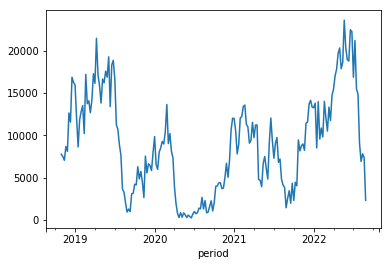

In [32]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le creux de l'épidémie se situe vers le mois de septembre, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence : à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre. Comme l'incidence de la varicelle est beaucoup plus faible à cette période de l'année, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [39]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [42]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

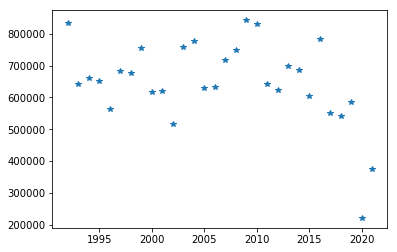

In [45]:
yearly_incidence.plot(style='*')

 Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [47]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

 Enfin, un histogramme montre que l'incidence reste stable, restant vers 0,1% de la population annuellement.

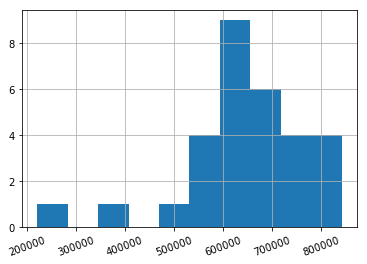

In [48]:
yearly_incidence.hist(xrot=20)